# Task 6

In [1]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, ZeroPadding2D
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import applications
import numpy as np

In [3]:
def get_length(Path, Pattern):
    # Pattern: name of the subdirectory
    Length = len(os.listdir(os.path.join(Path, Pattern)))
    return Length

In [4]:
train_data_dir = '/DL_course_data/Lab2/Bone/train/'
validation_data_dir = '/DL_course_data/Lab2/Bone/validation/'
img_width, img_height = 224,224
epochs = 150
batch_size = 8
LR = 0.00001

In [5]:
Len_C1_Train = get_length(train_data_dir,'AFF')
Len_C2_Train = get_length(train_data_dir,'NFF')
Len_C1_Val = get_length(validation_data_dir,'AFF')
Len_C2_Val = get_length(validation_data_dir,'NFF')

In [6]:
# loading the pre-trained model
# include top: false means that the dense layers at the top of the network will not be used.
model = applications.VGG16(include_top=False, weights='imagenet')
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [7]:
# Feature extraction from pretrained VGG (training data)
datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = datagen.flow_from_directory(
train_data_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode=None,
shuffle=False)
# Extracting the features from the loaded images
features_train = model.predict_generator(
train_generator,
(Len_C1_Train+Len_C2_Train) // batch_size, max_queue_size=1)

val_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

features_validation = model.predict_generator(
        val_generator,
        (Len_C1_Val+Len_C2_Val) // batch_size, max_queue_size=1)


Found 1112 images belonging to 2 classes.


<ipython-input-7-a42b4d2bdbec>:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  features_train = model.predict_generator(


Found 96 images belonging to 2 classes.


<ipython-input-7-a42b4d2bdbec>:21: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  features_validation = model.predict_generator(


In [8]:
train_data = features_train
train_labels = np.array([0] * int(Len_C1_Train) + [1] * int(Len_C2_Train))

validation_data = features_validation
validation_labels = np.array([0] * int(Len_C1_Val) + [1] * int(Len_C2_Val))

In [9]:
# Building the MLP model
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()


model.compile(optimizer=Adam(lr = LR),loss='binary_crossentropy', metrics=['accuracy'])


History = model.fit(train_data, train_labels,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(validation_data, validation_labels))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,211,521
Trainable params: 3,211,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


139/139 [==============================] - 0s 2ms/step - loss: 0.5779 - accuracy: 0.7032 - val_loss: 0.3896 - val_accuracy: 0.9583
Epoch 2/150
139/139 [==============================] - 0s 1ms/step - loss: 0.3435 - accuracy: 0.8984 - val_loss: 0.2349 - val_accuracy: 0.9792
Epoch 3/150
139/139 [==============================] - 0s 1ms/step - loss: 0.2223 - accuracy: 0.9694 - val_loss: 0.1614 - val_accuracy: 0.9896
Epoch 4/150
139/139 [==============================] - 0s 1ms/step - loss: 0.1620 - accuracy: 0.9793 - val_loss: 0.1134 - val_accuracy: 1.0000
Epoch 5/150
139/139 [==============================] - 0s 1ms/step - loss: 0.1306 - accuracy: 0.9892 - val_loss: 0.0907 - val_accuracy: 1.0000
Epoch 6/150
139/139 [==============================] - 0s 1ms/step - loss: 0.1003 - accuracy: 0.9910 - val_loss: 0.0731 - val_accuracy: 1.0000
Epoch 7/150
139/139 [==============================] - 0s 1ms/step - loss: 0.0845 - accuracy: 0.9928 - val_loss: 0.0693 - val_accuracy: 1.0000
Epoch 8/150

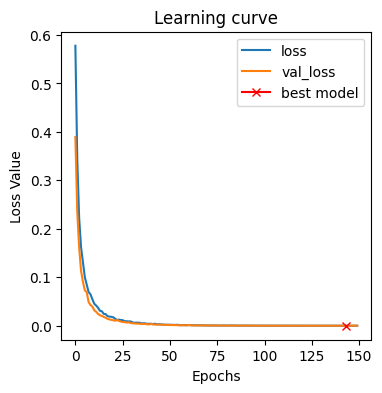

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend()
plt.show()

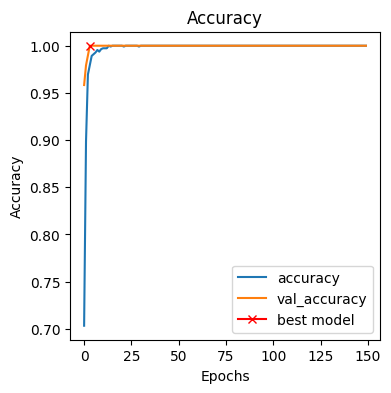

In [11]:
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(History.history["accuracy"], label="accuracy")
plt.plot(History.history["val_accuracy"], label="val_accuracy")
plt.plot( np.argmax(History.history["val_accuracy"]),
         np.max(History.history["val_accuracy"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()